In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
# DNER/AP/Div. Planejamento - Serv. Coord. e Gerência de Sistemas Rodoviários 
cities = pd.read_csv("distancias.csv", header=1, index_col=0)
#cities = cities.dropna()
cities = cities.drop(['PALMAS', 'S.J.DOS CAMPOS', 'UBERLÂNDIA'], axis=1)

In [4]:
selected_cities = cities.loc[cities.columns.to_numpy()]
selected_cities = selected_cities.fillna(0)

In [6]:
dist_matrix = selected_cities.to_numpy()
node_names = {i:{"title":selected_cities.index.to_numpy()[i]} for i in range(20)}

G = nx.from_numpy_matrix(dist_matrix)

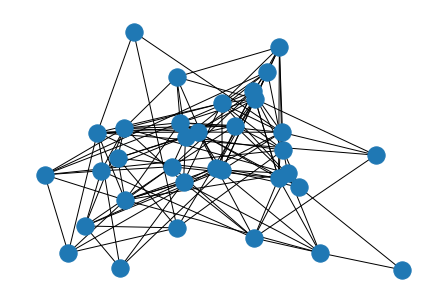

In [13]:
dist_matrix = selected_cities.to_numpy()
node_names = {i:{"title":selected_cities.index.to_numpy()[i]} for i in range(20)}

G = nx.from_numpy_matrix(dist_matrix)
nx.set_node_attributes(G, node_names)

np.random.seed(1)
idx = np.random.choice(len(G.edges), size=800)
G.remove_edges_from(np.array(G.edges)[idx])

nx.draw(G)

In [174]:
def dijkstra(G, src, tgt):
        
    n = len(G)
    dist = np.full(n, np.Inf)
    dist[src] = 0
    
    not_visited = np.arange(n)
    prev = np.full(n, None)
    current = src
    while not_visited.any():
        current = np.argmin([dist[i] for i in not_visited])
        not_visited = np.delete(not_visited, current)
        neig = [v for v in G[current] if v in not_visited]
        for u in neig:
            d = dist[current] + G[current][u]['weight']
            if d < dist[u]:
                dist[u] = d
                prev[u] = current
        if current == tgt:
            break
            
    path = [tgt]
    while not (prev[path[ -1 ]] is None):
        path.append(prev[path[-1]])
    
    return path[::-1]

In [175]:
path = dijkstra(G,0,1)

In [176]:
path

[0, 4, 1]

In [5]:
from pyvis.network import Network

net = Network(notebook=False, width="800px", height="500px")
net.from_nx(G)
net.show("city.html")

In [63]:
T = nx.minimum_spanning_tree(G)
print(sorted(T.edges(data=True)))

[(0, 10, {'weight': 322.0, 'label': 322.0}), (0, 18, {'weight': 294.0, 'label': 294.0}), (1, 30, {'weight': 806.0, 'label': 806.0}), (2, 16, {'weight': 272.0, 'label': 272.0}), (3, 19, {'weight': 785.0, 'label': 785.0}), (4, 13, {'weight': 209.0, 'label': 209.0}), (5, 25, {'weight': 238.0, 'label': 238.0}), (5, 31, {'weight': 99.0, 'label': 99.0}), (6, 8, {'weight': 694.0, 'label': 694.0}), (6, 17, {'weight': 615.0, 'label': 615.0}), (7, 22, {'weight': 150.0, 'label': 150.0}), (8, 23, {'weight': 1456.0, 'label': 1456.0}), (9, 15, {'weight': 130.0, 'label': 130.0}), (9, 17, {'weight': 379.0, 'label': 379.0}), (9, 31, {'weight': 408.0, 'label': 408.0}), (10, 28, {'weight': 116.0, 'label': 116.0}), (10, 33, {'weight': 1124.0, 'label': 1124.0}), (11, 15, {'weight': 180.0, 'label': 180.0}), (11, 22, {'weight': 476.0, 'label': 476.0}), (12, 20, {'weight': 537.0, 'label': 537.0}), (12, 32, {'weight': 634.0, 'label': 634.0}), (13, 25, {'weight': 615.0, 'label': 615.0}), (14, 20, {'weight': 185